## Description

In this data analysis project focused on online chess games, we explore various aspects to gain insights into the game patterns and outcomes. The dataset includes information on common openings, number of turns, and game outcomes. By analyzing the frequency of different opening moves, we can identify the most popular strategies employed by players. Additionally, examining the distribution of the number of turns can provide an understanding of game durations and potential patterns that lead to decisive outcomes.

In this notebook, we will be looking at common openings and strategies used by online chess players. We will be answering the following questions:
* What are common openings used by players?
* What are the most common variations of the these openings?
* Which openings translated to the most wins?
* Which variations of winning openings are the most common?
* Which variations of the least winning openings are the most common?
* Which openings have the most variations?
* How long do online chess matches often last?
* Is the player rating related to the outcome?
* Is the difference between player ratings related to the outcome?


## Preparation

In [284]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import textwrap as tw
import matplotlib.pyplot as plt

In [285]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Online Chess Game/chess_games.csv")

In [286]:
df.columns

Index(['game_id', 'rated', 'turns', 'victory_status', 'winner',
       'time_increment', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_code', 'opening_moves',
       'opening_fullname', 'opening_shortname', 'opening_response',
       'opening_variation'],
      dtype='object')

In [287]:
## Renaming some columns.

df = df.rename(columns={
    "victory_status":"outcome",
    "white_id":"white_player_id",
    "white_rating":"white_player_rating",
    "black_id":"black_player_id",
    "black_rating":"black_player_rating"
})

In [288]:
## Assessing data types

df.info()

## Some of the records have null values for "opening_response."
## This is fine as not all responses have an agreed-upon name.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   game_id              20058 non-null  int64 
 1   rated                20058 non-null  bool  
 2   turns                20058 non-null  int64 
 3   outcome              20058 non-null  object
 4   winner               20058 non-null  object
 5   time_increment       20058 non-null  object
 6   white_player_id      20058 non-null  object
 7   white_player_rating  20058 non-null  int64 
 8   black_player_id      20058 non-null  object
 9   black_player_rating  20058 non-null  int64 
 10  moves                20058 non-null  object
 11  opening_code         20058 non-null  object
 12  opening_moves        20058 non-null  int64 
 13  opening_fullname     20058 non-null  object
 14  opening_shortname    20058 non-null  object
 15  opening_response     1207 non-null   object
 16  open

## Data Analysis and Visualizations

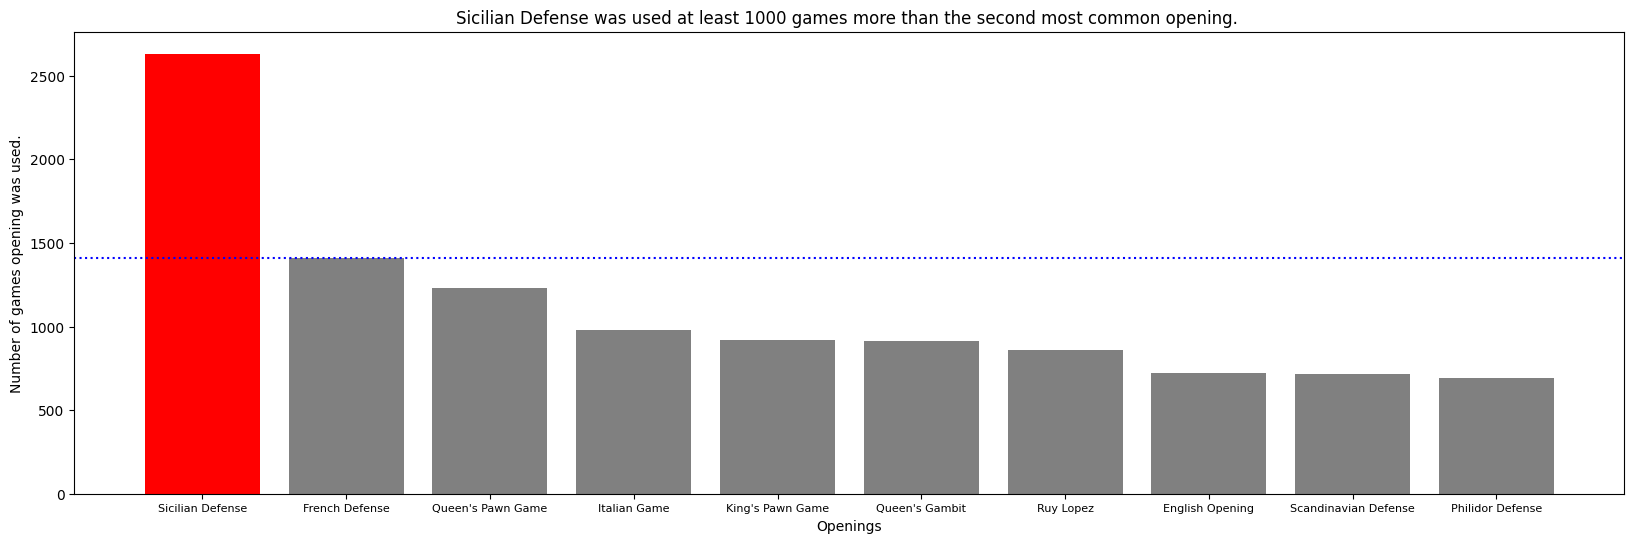

In [289]:
## Graphing the most common openings

data = df.groupby("opening_shortname").agg("count")["game_id"].to_frame()
data = data.sort_values(by="game_id",ascending=False).head(10)
data = data.reset_index()
data_x = data["opening_shortname"]
data_y = data["game_id"]


maxval = max(data["game_id"])

plt.figure(figsize=(20,6))
plt.bar(data_x,data_y,color=["red" if count == maxval else "gray" for count in data["game_id"]])

data_french = data.loc[data["opening_shortname"] == "French Defense", "game_id"]
plt.axhline(data_french[1],linestyle=":",color="blue")

plt.title("Sicilian Defense was used at least 1000 games more than the second most common opening. ")
plt.ylabel("Number of games opening was used.")
plt.xlabel("Openings")
plt.xticks(fontsize=8)
plt.show()

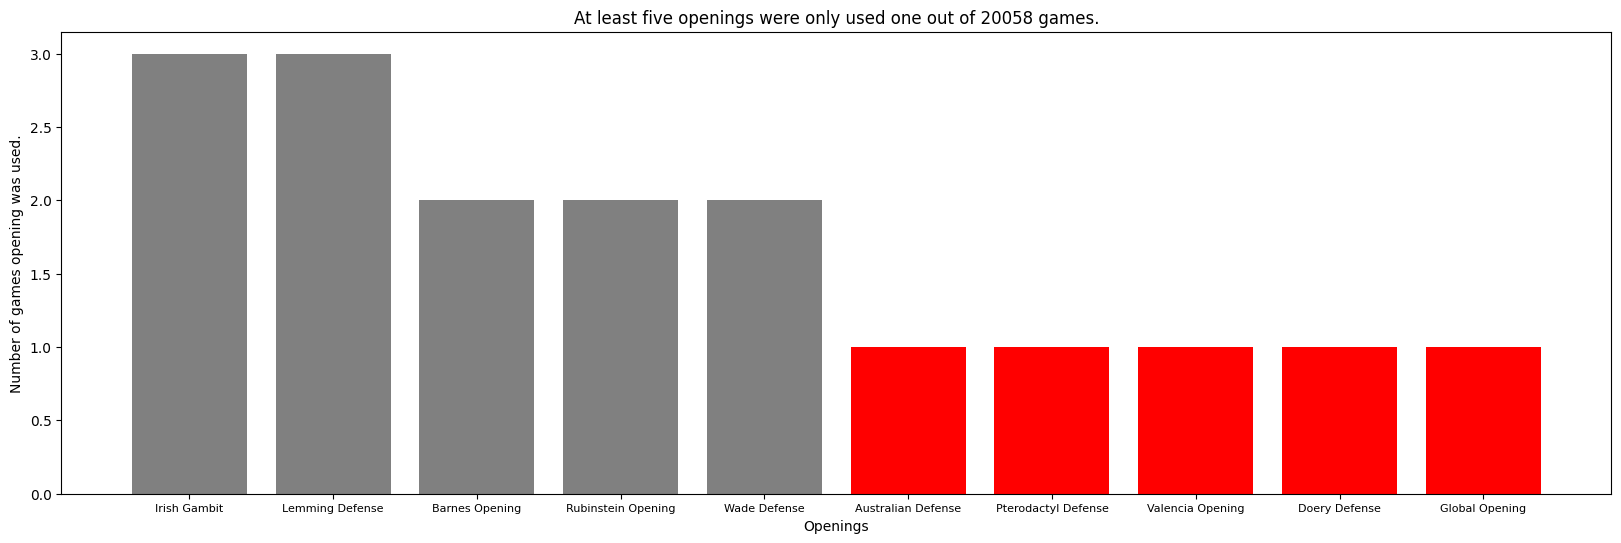

In [290]:
## Graphing the least commmon openings

data = df.groupby("opening_shortname").agg("count")["game_id"].to_frame()
data = data.sort_values(by="game_id",ascending=False).tail(10)
data = data.reset_index()
data_x = data["opening_shortname"]
data_y = data["game_id"]


minval = min(data["game_id"])

plt.figure(figsize=(20,6))
plt.bar(data_x,data_y,color=["red" if count == minval else "gray" for count in data["game_id"]])

plt.title("At least five openings were only used one out of 20058 games.")
plt.ylabel("Number of games opening was used.")
plt.xlabel("Openings")
plt.xticks(fontsize=8)
plt.show()

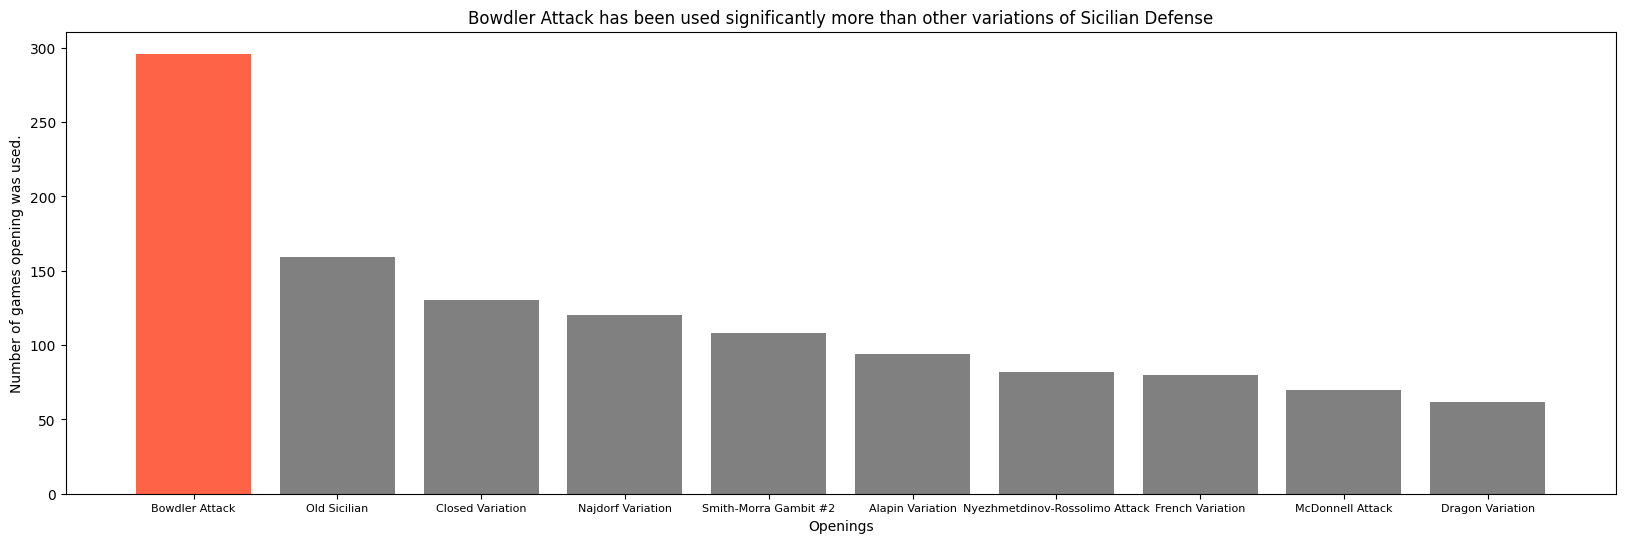

In [291]:
## Most common variations of Sicilian Defense

data = df.loc[df["opening_shortname"] == "Sicilian Defense"]
data = data.groupby("opening_variation").agg("count")["game_id"].to_frame()
data = data.sort_values(by="game_id",ascending=False).head(10)
data = data.reset_index()
data_x = data["opening_variation"]
data_y = data["game_id"]


maxval = max(data["game_id"])

plt.figure(figsize=(20,6))
plt.bar(data_x,data_y,color=["tomato" if count == maxval else "gray" for count in data["game_id"]])

plt.title("Bowdler Attack has been used significantly more than other variations of Sicilian Defense")
plt.ylabel("Number of games opening was used.")
plt.xlabel("Openings")
plt.xticks(fontsize=8)
plt.show()

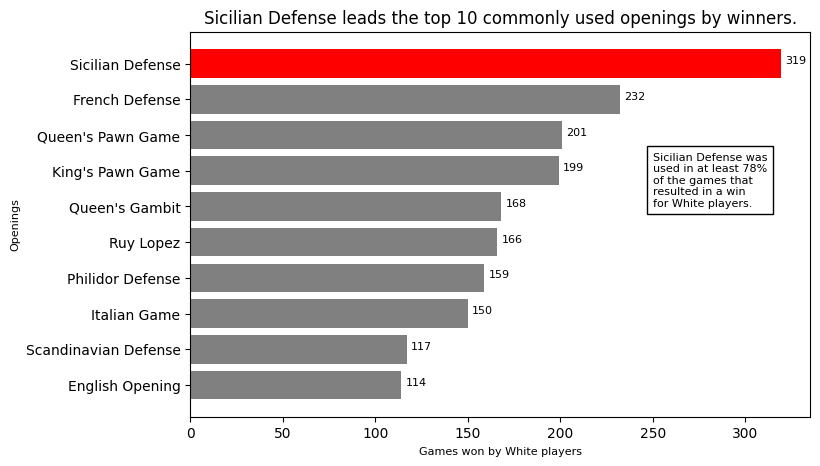

In [292]:
## Openings that resulted in Mates for White players.

data = df.loc[(df["outcome"] == "Mate") & (df["winner"] == "White")]
data = data.groupby("opening_shortname").agg("count")["game_id"].to_frame()
data = data.sort_values("game_id",ascending=False)
data = data.reset_index().head(10).sort_values("game_id",ascending=True)

## plotting horizontal bar chart.

data_x = data["game_id"]
data_y = data["opening_shortname"]

maxval = max(data["game_id"])

plt.figure(figsize=(8,5))
plt.barh(data_y,data_x,color=["red" if opening == maxval else "gray" for opening in data["game_id"]])
plt.ylabel("Openings",fontsize=8)
plt.xlabel("Games won by White players",fontsize=8)
plt.title("Sicilian Defense leads the top 10 commonly used openings by winners.")

text = tw.fill("Sicilian Defense was used in at least 78% of the games that resulted in a win for White players.",width=20)

plt.text(250,5,text,fontsize=8,bbox={"facecolor":"white","edgecolor":"black"})

for i,v in enumerate(data["game_id"]):
  plt.text(v+8,i,str(v),ha="center",fontsize=8)

plt.show()


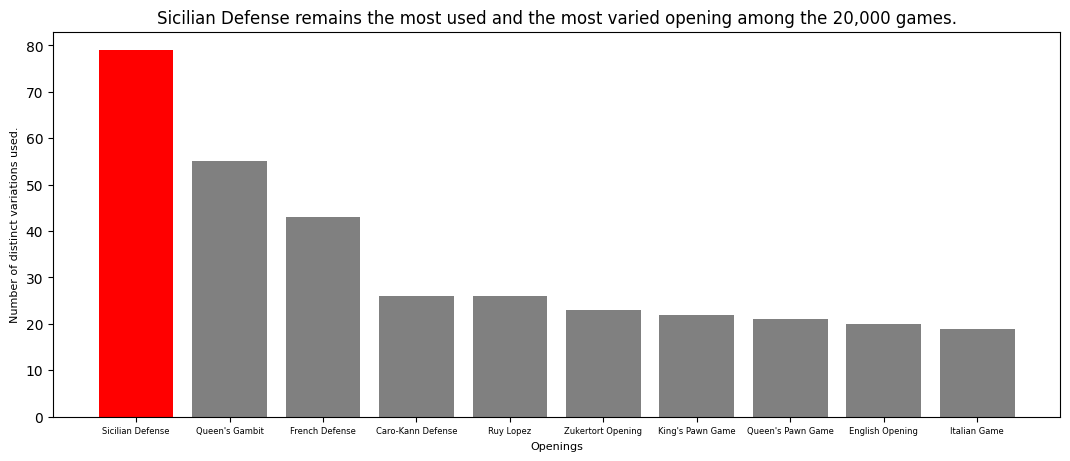

In [293]:
## Openings used with the most number of variations.

data = df.groupby("opening_shortname")["opening_variation"].nunique().to_frame()
data = data.reset_index().sort_values("opening_variation",ascending=False).head(10)
data_x = data["opening_shortname"]
data_y = data["opening_variation"]



plt.figure(figsize=(13,5))
plt.title("Sicilian Defense remains the most used and the most varied opening among the 20,000 games.")
maxval = max(data["opening_variation"])
plt.bar(data_x,data_y,color=["red" if variation  == maxval else "gray" for variation in data["opening_variation"]])
plt.ylabel("Number of distinct variations used.",fontsize=8)
plt.xlabel("Openings",fontsize=8)
plt.xticks(fontsize=6)
plt.show()

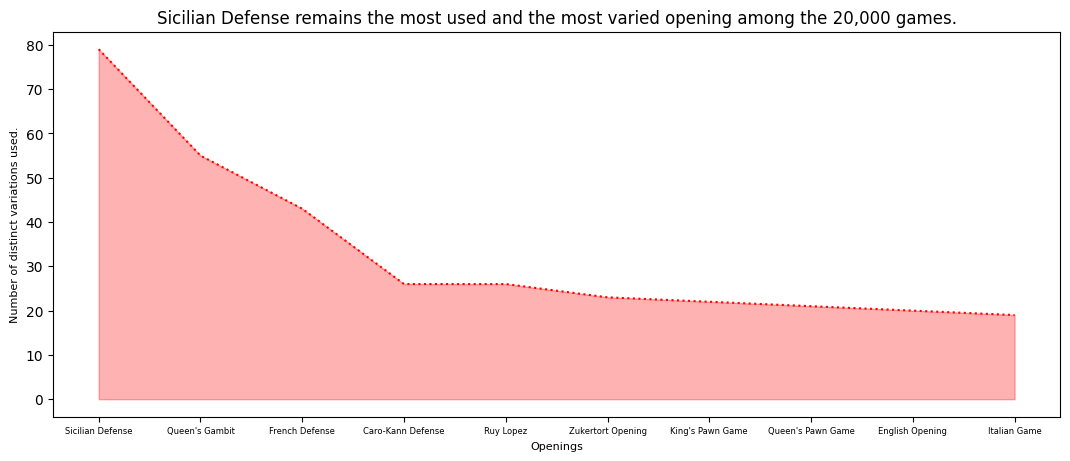

In [294]:
## Openings used with the most number of variations.

data = df.groupby("opening_shortname")["opening_variation"].nunique().to_frame()
data = data.reset_index().sort_values("opening_variation",ascending=False).head(10)
data_x = data["opening_shortname"]
data_y = data["opening_variation"]

plt.figure(figsize=(13,5))
plt.title("Sicilian Defense remains the most used and the most varied opening among the 20,000 games.")
maxval = max(data["opening_variation"])
plt.fill_between(data_x,data_y,color="red",alpha=0.3)
plt.plot(data_x,data_y,linestyle=":",color="red")
plt.ylabel("Number of distinct variations used.",fontsize=8)
plt.xlabel("Openings",fontsize=8)
plt.xticks(fontsize=6)
plt.show()

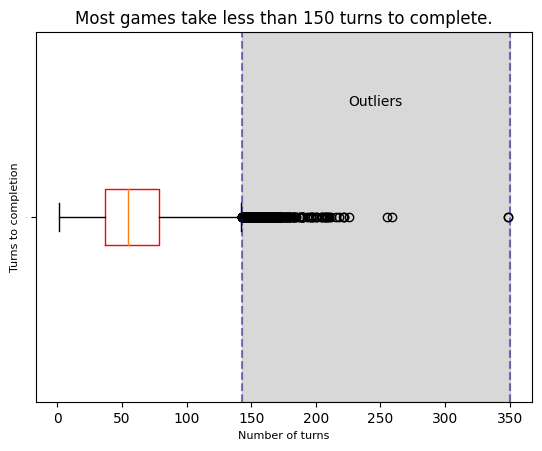

In [295]:
## Average number of turns.

plt.boxplot(df["turns"],vert=False,boxprops={"color":"red"})
plt.title("Most games take less than 150 turns to complete.")
plt.yticks(fontsize=0)
plt.ylabel("Turns to completion",fontsize=8)
plt.xlabel("Number of turns",fontsize=8)
line1 = plt.axvline(143,linestyle="--",alpha=0.5,color="darkblue")
line2 = plt.axvline(350,linestyle="--",alpha=0.5,color="darkblue")
plt.text(225,1.3,"Outliers")
plt.ylim()
plt.fill_betweenx(plt.ylim(),143,350,alpha=0.3,color="gray")
plt.show()

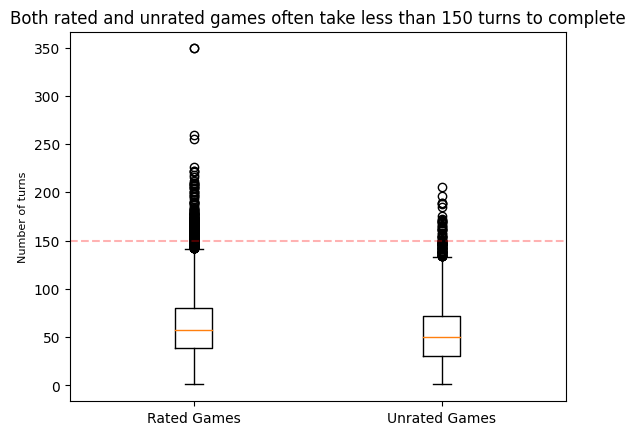

In [296]:
## Average number of turns for rated games and unrated games.


data_x = df.loc[df["rated"] == True]["turns"]
data_y = df.loc[df["rated"] == False]["turns"]

plt.boxplot([data_x,data_y],labels=["Rated Games","Unrated Games"])
plt.title("Both rated and unrated games often take less than 150 turns to complete")
plt.ylabel("Number of turns",fontsize=8)
plt.axhline(150,linestyle="--",alpha=0.3,color="red")
plt.show()

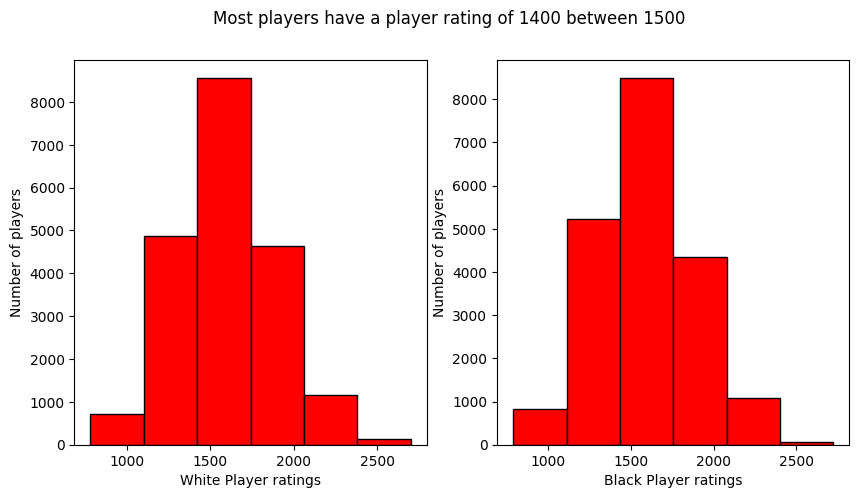

In [297]:
## Distribution of ratings.

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

data = df["white_player_rating"]
ax1.hist(data,bins=6,edgecolor="black",color="red")
ax1.set_ylabel("Number of players")
ax1.set_xlabel("White Player ratings")

data = df["black_player_rating"]
ax2.hist(data,bins=6,edgecolor="black",color="red")
ax2.set_ylabel("Number of players")
ax2.set_xlabel("Black Player ratings")

fig.suptitle("Most players have a player rating of 1400 between 1500")
plt.show()

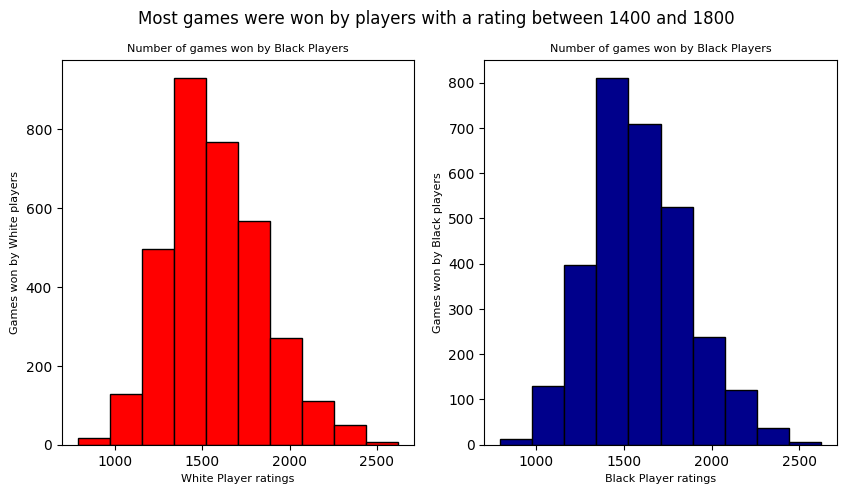

In [298]:
## Proportion of ratings for games resulting in wins.

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

data = df.loc[(df["outcome"] == "Mate") & (df["winner"] == "White")]
data = data["white_player_rating"].to_frame()
ax1.hist(data,edgecolor="black",bins=10,color="red")
ax1.set_xlabel("White Player ratings",fontsize=8)
ax1.set_ylabel("Games won by White players",fontsize=8)
ax1.set_title("Number of games won by Black Players",fontsize=8)

data = df.loc[(df["outcome"] == "Mate") & (df["winner"] == "Black")]
data = data["black_player_rating"].to_frame()
ax2.hist(data,edgecolor="black",bins=10,color="darkblue")
ax2.set_xlabel("Black Player ratings",fontsize=8)
ax2.set_ylabel("Games won by Black players",fontsize=8)
ax2.set_title("Number of games won by Black Players",fontsize=8)

fig.suptitle("Most games were won by players with a rating between 1400 and 1800")

plt.show()

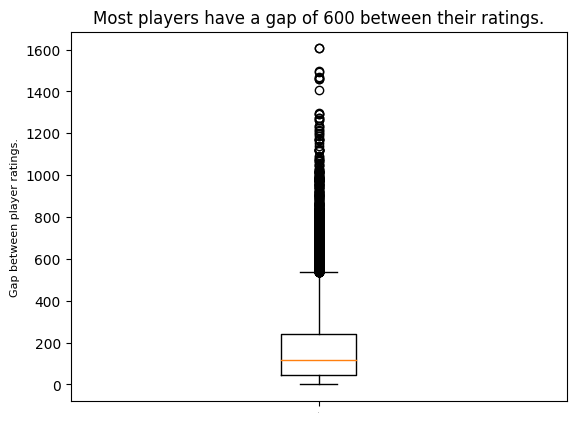

In [299]:
## Gaps between player ratings for White Players and Black Players



gap = df["white_player_rating"] - df["black_player_rating"]
gap = gap.apply(lambda x: abs(x)).to_frame()

plt.boxplot(gap)
plt.title("Most players have a gap of 600 between their ratings.")
plt.ylabel("Gap between player ratings.",fontsize=8)
plt.xticks(fontsize=0)
plt.show()